In [1]:
# This is Maria Capstone, final project week5
import numpy as np 

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests
from bs4 import BeautifulSoup
from tabulate import tabulate

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
#Getting the data
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

df=df[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [3]:
#Remove rows with Borough not assigned
df = df.drop(df[df["Borough"] == "Not assigned"].index)
for i in range(0,df.shape[0]):
    if df.iloc[i,2]=='Not assigned':
        df.iloc[i,2]=df.iloc[i,1]
df.head()   

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [4]:
#Group by Postal code
result = df.groupby(['Postcode','Borough'], sort=False).agg( ', '.join).reset_index()
result.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [5]:
print('The size of the final dataframe is %d rows by %d columns.' % (result.shape[0],result.shape[1]))

The size of the final dataframe is 103 rows by 3 columns.


In [6]:
# Adding Coordinates for postal code

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

#@hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# Credentials has been removed intentionally
client_aaa = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='aaa',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0dbbf3850ee341c2b882fd1bc576829c.get_object(Bucket='aaar',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
d=result.join(df_data_1.set_index('Postal Code').Latitude, on='Postcode')
data=d.join(df_data_1.set_index('Postal Code').Longitude, on='Postcode')
data.head()
data.shape

(103, 5)

In [237]:
data.head(103)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [8]:
#Checking and exploring the data
#the credentials has been deleted. Personal information and credentials

# @hidden_cell
CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'yyy' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [9]:
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [16]:
#Creating a map with postal codes and coordinates
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
data_venues = getNearbyVenues(names=data['Neighbourhood'],latitudes=data['Latitude'],longitudes=data['Longitude']);

Parkwoods
Victoria Village
Harbourfront, Regent Park
Lawrence Heights, Lawrence Manor
Queen's Park
Islington Avenue
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Ryerson, Garden District
Glencairn
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Highland Creek, Rouge Hill, Port Union
Flemingdon Park, Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Thorncliffe Park
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
East Birchmount Park, Ionview, Kennedy Park
Bayview Village
CFB Toronto, Downsview East
The D

In [21]:
print(data_venues.shape)
data_venues.head()

(1710, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [22]:
data_venues.groupby('Neighborhood').count().reset_index()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Adelaide, King, Richmond",50,50,50,50,50,50
1,Agincourt,4,4,4,4,4,4
2,"Agincourt North, L'Amoreaux East, Milliken, St...",2,2,2,2,2,2
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",9,9,9,9,9,9
4,"Alderwood, Long Branch",9,9,9,9,9,9
5,"Bathurst Manor, Downsview North, Wilson Heights",18,18,18,18,18,18
6,Bayview Village,4,4,4,4,4,4
7,"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
8,Berczy Park,50,50,50,50,50,50
9,"Birch Cliff, Cliffside West",4,4,4,4,4,4


In [23]:
# one hot encoding
data_onehot = pd.get_dummies(data_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
data_onehot['Neighborhood'] = data_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [data_onehot.columns[-1]] + list(data_onehot.columns[:-1])
data_onehot = data_onehot[fixed_columns]

data_grouped = data_onehot.groupby('Neighborhood').mean().reset_index()
data_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.02,0.0,0.0,0.0,0.02,0.02,0.0,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [25]:
# Create a model to see if a Mediterranean Restaurant is fine
# Create the data frame
typeR='Mediterranean Restaurant'
X=data_grouped.loc[:, data_grouped.columns!= 'Neighborhood']
X[X > 0]=1;
Xf = pd.DataFrame(data=X)
Xf.head()
y=np.ravel(Xf.loc[:, Xf.columns == typeR])
X=Xf.loc[:, Xf.columns != typeR]
Xf.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (50, 250) (50,)
Test set: (50, 250) (50,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [196]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.48, 0.52],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.53, 0.47],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.53, 0.47],
       [0.53, 0.47],
       [0.53, 0.47],
       [0.45, 0.55],
       [0.53, 0.47],
       [0.53, 0.47],
       [0.44, 0.56],
       [0.53, 0.47],
       [0.53, 0.47],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.53, 0.47],
       [0.5 , 0.5 ],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.45, 0.55],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.47, 0.53],
       [0.52, 0.48],
       [0.53, 0.47],
       [0.48, 0.52],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.45, 0.55],
       [0.51, 0.49],
       [0.53, 0.47],
       [0.49, 0.51],
       [0.53, 0.47],
       [0.51, 0.49],
       [0.46, 0.54],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.53, 0.47],
       [0.51,

In [29]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.98

In [30]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 0  1]
 [ 0 49]]


Confusion matrix, without normalization
[[ 8  2]
 [ 6 34]]


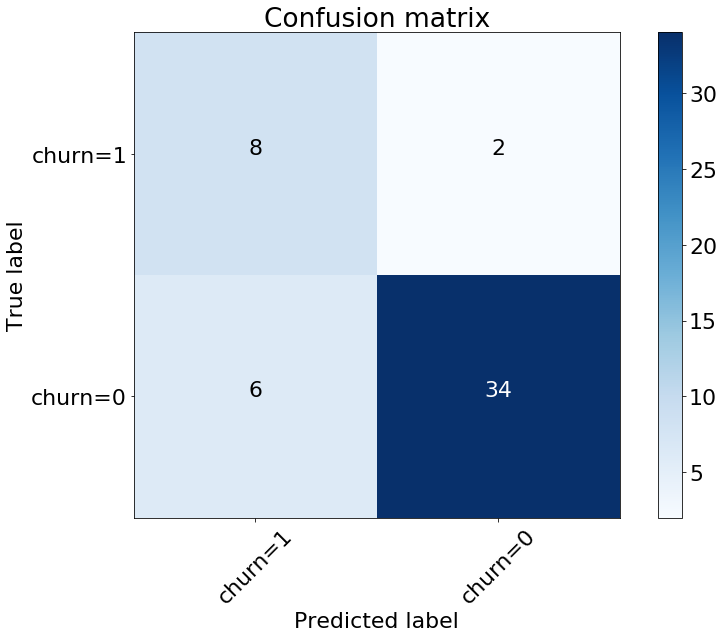

In [199]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 9))
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [33]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        49
         1.0       0.00      0.00      0.00         1

   micro avg       0.98      0.98      0.98        50
   macro avg       0.49      0.50      0.49        50
weighted avg       0.96      0.98      0.97        50



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[ 0  2]
 [ 0 98]]


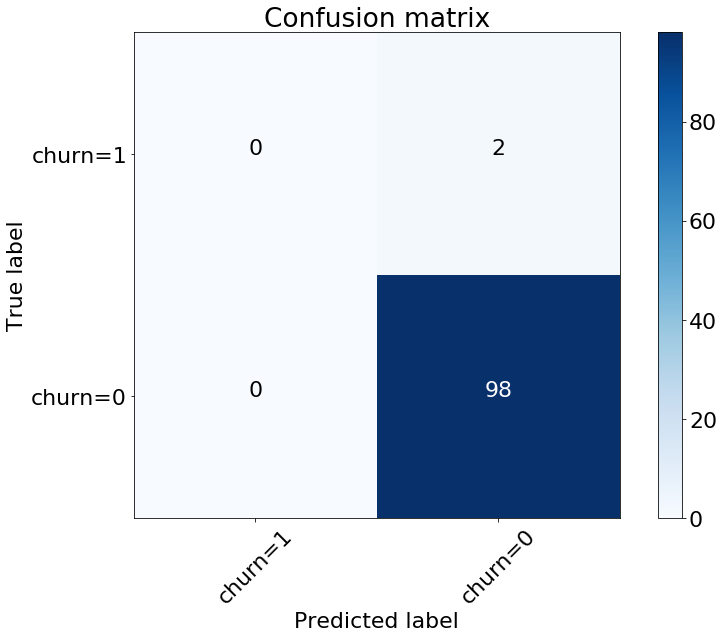

In [34]:
yhat = LR.predict(X)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 9))
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [35]:
kmeans=np.zeros(100)
for i in range(0,100):
    if y[i]==0 and yhat[i]==0:
        kmeans[i]=1
    elif y[i]==1 and yhat[i]==0:
        kmeans[i]=2
    elif y[i]==0 and yhat[i]==1:
        kmeans[i]=3
    else:
        kmeans[i]=4
kmeans

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
data_temp=pd.DataFrame(data=data_grouped.Neighborhood)
data_temp.head()

data_final=data_temp.join(data_venues.set_index('Neighborhood')['Neighborhood Latitude'], on='Neighborhood')
data_final=data_final.join(data_venues.set_index('Neighborhood')['Neighborhood Longitude'], on='Neighborhood')

data_final.drop_duplicates(inplace=True)
data_final.head(100)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,"Adelaide, King, Richmond",43.650571,-79.384568
1,Agincourt,43.794200,-79.262029
2,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437
4,"Alderwood, Long Branch",43.602414,-79.543484
5,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259
6,Bayview Village,43.786947,-79.385975
7,"Bedford Park, Lawrence Manor East",43.733283,-79.419750
8,Berczy Park,43.644771,-79.373306
9,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [37]:
latitude=43.653963
longitude=-79.387207
# set number of clusters
kclusters = 4
data_final.insert(3, 'Cluster Labels', kmeans)

In [38]:
data_final.astype({'Cluster Labels': 'int'}).dtypes
data_final.head(100)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels
0,"Adelaide, King, Richmond",43.650571,-79.384568,1.0
1,Agincourt,43.794200,-79.262029,1.0
2,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577,1.0
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,1.0
4,"Alderwood, Long Branch",43.602414,-79.543484,1.0
5,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,1.0
6,Bayview Village,43.786947,-79.385975,1.0
7,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,1.0
8,Berczy Park,43.644771,-79.373306,1.0
9,"Birch Cliff, Cliffside West",43.692657,-79.264848,1.0


In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude],width=1000,height=600, zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_final['Neighborhood Latitude'], data_final['Neighborhood Longitude'], data_final['Neighborhood'], data_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
#Create a model to find the optimal location

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=food'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            500, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
data_food = getNearbyVenues(names=data['Neighbourhood'],latitudes=data['Latitude'],longitudes=data['Longitude']);

Parkwoods
Victoria Village
Harbourfront, Regent Park
Lawrence Heights, Lawrence Manor
Queen's Park
Islington Avenue
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Ryerson, Garden District
Glencairn
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Highland Creek, Rouge Hill, Port Union
Flemingdon Park, Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Thorncliffe Park
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
East Birchmount Park, Ionview, Kennedy Park
Bayview Village
CFB Toronto, Downsview East
The D

In [44]:
print(data_food.shape)
data_food.head()

(1283, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
1,Parkwoods,43.753259,-79.329656,Bella Vita Catering & Private Chef Service,43.756651,-79.331524,BBQ Joint
2,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
3,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
4,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place


In [45]:
data_food.groupby('Neighborhood').count().reset_index()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Adelaide, King, Richmond",50,50,50,50,50,50
1,Agincourt,4,4,4,4,4,4
2,"Albion Gardens, Beaumond Heights, Humbergate, ...",5,5,5,5,5,5
3,"Alderwood, Long Branch",4,4,4,4,4,4
4,"Bathurst Manor, Downsview North, Wilson Heights",9,9,9,9,9,9
5,Bayview Village,3,3,3,3,3,3
6,"Bedford Park, Lawrence Manor East",20,20,20,20,20,20
7,Berczy Park,50,50,50,50,50,50
8,"Birch Cliff, Cliffside West",4,4,4,4,4,4
9,"Bloordale Gardens, Eringate, Markland Wood, Ol...",4,4,4,4,4,4


In [46]:
# Create the data frame
typeR='Mediterranean Restaurant'
X=data_food
Xf = pd.DataFrame(data=X)
y=Xf.loc[:, Xf.columns == typeR]
X=Xf.loc[:, Xf.columns != typeR]
Xf.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
1,Parkwoods,43.753259,-79.329656,Bella Vita Catering & Private Chef Service,43.756651,-79.331524,BBQ Joint
2,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
3,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
4,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place


In [47]:
# one hot encoding
data_onehot = pd.get_dummies(data_food[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
data_onehot['Neighborhood'] = data_food['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [data_onehot.columns[-1]] + list(data_onehot.columns[:-1])
data_onehot = data_onehot[fixed_columns]

data_food_grouped = data_onehot.groupby('Neighborhood').mean().reset_index()
data_food_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Peking Duck Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,"Adelaide, King, Richmond",0.0,0.08,0.0,0.0,0.06,0.0,0.0,0.02,0.0,0.0,0.02,0.04,0.04,0.02,0.0,0.08,0.0,0.0,0.000000,0.02,0.0,0.0,0.0,0.020000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.000000,0.04,0.0,0.02,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.02,0.0,0.00,0.0,0.0,0.02,0.0,0.000000,0.0,0.0,0.0,0.02,0.02,0.0,0.0,0.040000,0.0,0.0,0.0,0.0,0.02,0.040000,0.02,0.020000,0.04,0.0,0.0,0.0,0.0,0.08,0.060000,0.0,0.0,0.0,0.06,0.0,0.02,0.0,0.0
1,Agincourt,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.25,0.00,0.00,0.0,0.00,0.0,0.0,0.250000,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.25,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.250000,0.00,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
2,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.200000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.20,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.200000,0.00,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
3,"Alderwood, Long Branch",0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.25,0.00,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.250000,0.00,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
4,"Bathurst Manor, Downsview North, Wilson Heights",0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.111111,0.00,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.111111,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.111111,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.00,0.111111,0.00,0.111111,0.00,0.0,0.0,0.0,0.0,0.00,0.111111,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0


In [48]:
# Create the data frame
typeR='Mediterranean Restaurant'
X=data_food_grouped.loc[:,data_food_grouped.columns!= 'Neighborhood']
Xf = pd.DataFrame(data=X)
y=np.ravel(Xf.loc[:, Xf.columns == typeR])
X=Xf.loc[:, Xf.columns != typeR]
Xf.head()

,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Peking Duck Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,0.0,0.08,0.0,0.0,0.06,0.0,0.0,0.02,0.0,0.0,0.02,0.04,0.04,0.02,0.0,0.08,0.0,0.0,0.000000,0.02,0.0,0.0,0.0,0.020000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.000000,0.04,0.0,0.02,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.02,0.0,0.00,0.0,0.0,0.02,0.0,0.000000,0.0,0.0,0.0,0.02,0.02,0.0,0.0,0.040000,0.0,0.0,0.0,0.0,0.02,0.040000,0.02,0.020000,0.04,0.0,0.0,0.0,0.0,0.08,0.060000,0.0,0.0,0.0,0.06,0.0,0.02,0.0,0.0
1,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.25,0.00,0.00,0.0,0.00,0.0,0.0,0.250000,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.25,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.250000,0.00,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
2,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.200000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.20,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.200000,0.00,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.25,0.00,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.250000,0.00,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
4,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.111111,0.00,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.111111,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.111111,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.00,0.111111,0.00,0.111111,0.00,0.0,0.0,0.0,0.0,0.00,0.111111,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0


In [49]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 1.21 -1.   -0.18 -0.2  -1.   -1.   -1.   -1.   -1.05 -0.63 -1.   -1.
 -1.   -1.   -1.   -1.   -0.88 -1.   -1.   -0.37 -1.   -0.92 -1.14 -1.
 -1.   -1.   -0.14 -0.17 -0.39 -0.86 -1.   -1.67 -1.14 -1.   -1.   -1.08
 -1.   -1.   -1.   -1.   -1.   -1.   -0.22 -0.79 -1.   -1.   -1.   -0.22
 -1.    0.32 -1.19 -1.   -1.   -1.   -1.   -0.74 -0.74 -1.   -1.   -0.4
 -0.66 -0.65 -1.   -1.   -1.    0.07 -1.   -1.37 -1.91 -1.   -0.17 -1.47
 -1.   -0.85 -1.   -1.   -1.   -0.83  0.05 -0.75 -0.92 -1.    0.07 -1.
 -1.   -1.   -1.91 -1.83 -1.   -1.  ]


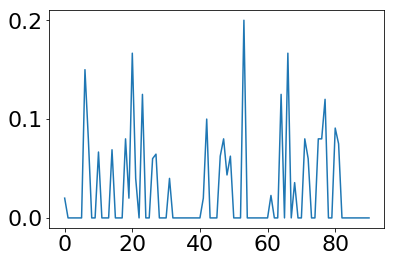

In [360]:
y_hat= regr.predict(X)
plt.plot(y_hat)

In [50]:
data_final.loc[data_final['Cluster Labels']==3]['Neighborhood']

Series([], Name: Neighborhood, dtype: object)

In [418]:
print(data_grouped.shape)
num_top_venues = 5

for hood in data_final.loc[data_final['Cluster Labels']==3]['Neighborhood']:
    print("----"+hood+"----")
    temp = data_food_grouped[data_food_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

(100, 252)
----Adelaide, King, Richmond----
                 venue  freq
0  American Restaurant  0.08
1           Steakhouse  0.08
2                 Café  0.08
3     Asian Restaurant  0.06
4      Thai Restaurant  0.06


----Commerce Court, Victoria Hotel----
                 venue  freq
0                 Café  0.12
1  American Restaurant  0.08
2           Restaurant  0.08
3            Gastropub  0.06
4   Italian Restaurant  0.06


----First Canadian Place, Underground city----
           venue  freq
0           Café  0.14
1     Steakhouse  0.08
2     Restaurant  0.08
3  Deli / Bodega  0.06
4      Gastropub  0.06


----Humber Bay Shores, Mimico South, New Toronto----
                 venue  freq
0                 Café  0.18
1          Pizza Place  0.18
2   Mexican Restaurant  0.09
3  American Restaurant  0.09
4               Bakery  0.09


----Leaside----
              venue  freq
0  Sushi Restaurant  0.18
1       Pizza Place  0.14
2    Sandwich Place  0.14
3      Burger Joint  0.09
4  

In [51]:
data_final.loc[data_final['Cluster Labels']==4]['Neighborhood']

Series([], Name: Neighborhood, dtype: object)

In [52]:
data_f=data_food_grouped.iloc[[7,8,11,15,19,20,21,22,27,31,44,48,49,50,51,64,73,77,81,82,83,87],:]
data_f.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Peking Duck Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
7,Berczy Park,0.0,0.02,0.00,0.0,0.0,0.02,0.02,0.06,0.02,0.04,0.0,0.02,0.00,0.00,0.0,0.04,0.0,0.00,0.00,0.0,0.02,0.02,0.0,0.0,0.0,0.04,0.00,0.00,0.00,0.02,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.04,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.00,0.02,0.0,0.02,0.08,0.00,0.0,0.0,0.0,0.0,0.0,0.02,0.02,0.0,0.0,0.04,0.0,0.00,0.0,0.0,0.02,0.0,0.0,0.02,0.0,0.00,0.04,0.0,0.06,0.04,0.00,0.0,0.0,0.0,0.06,0.06,0.00,0.0,0.02,0.02,0.0,0.04,0.00,0.0
8,"Birch Cliff, Cliffside West",0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.25,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.50,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0
11,Business Reply Mail Processing Centre 969 Eastern,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.20,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.4,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.20,0.0,0.0,0.00,0.0,0.00,0.20,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0
15,Caledonia-Fairbanks,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0
19,"Chinatown, Grange Park, Kensington Market",0.0,0.00,0.02,0.0,0.0,0.00,0.02,0.06,0.02,0.00,0.0,0.00,0.04,0.02,0.0,0.14,0.0,0.04,0.04,0.0,0.04,0.00,0.0,0.0,0.0,0.00,0.02,0.02,0.04,0.00,0.0,0.0,0.0,0.0,0.02,0.02,0.0,0.02,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.02,0.00,0.0,0.00,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.08,0.00,0.0,0.0,0.00,0.0,0.02,0.0,0.0,0.02,0.0,0.0,0.00,0.0,0.02,0.00,0.0,0.00,0.00,0.02,0.0,0.0,0.0,0.00,0.00,0.02,0.0,0.00,0.02,0.0,0.12,0.06,0.0


In [53]:
typeR='Mediterranean Restaurant'
X=data_f.loc[:,data_f.columns!= 'Neighborhood']
Xf = pd.DataFrame(data=X)
y=np.ravel(Xf.loc[:, Xf.columns == typeR])
X=Xf.loc[:, Xf.columns != typeR]

In [55]:
from scipy.stats import pearsonr
a=np.zeros(91)
for i in range(0,90):
    try:
        a[i],b=pearsonr(Xf.iloc[:,i], y)
    except: 

In [56]:
ac=data_f.loc[:, data_f.columns!= 'Neighborhood']
ab=pd.DataFrame(ac.columns)

In [57]:
ab.insert(1, 'Pearson', abs(a))
ab.Pearson.fillna(0, inplace=True)
ab.head(90)

,0,Pearson
0,Afghan Restaurant,0.030058
1,American Restaurant,0.113856
2,Arepa Restaurant,0.053914
3,Argentinian Restaurant,0.000000
4,Asian Restaurant,0.083156
5,BBQ Joint,0.053914
6,Bagel Shop,0.070524
7,Bakery,0.126774
8,Belgian Restaurant,0.078128
9,Bistro,0.053914


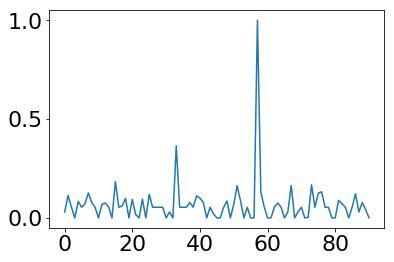

In [58]:
plt.plot(abs(np.nan_to_num(a)))

In [59]:
print(ab.sort_values('Pearson', ascending=False).reset_index(drop=True).head(10))

                          0   Pearson
0  Mediterranean Restaurant  1.000000
1      Fast Food Restaurant  0.364503
2                      Café  0.183863
3                Restaurant  0.167626
4               Pizza Place  0.163773
5        Italian Restaurant  0.162859
6        Mexican Restaurant  0.131810
7        Seafood Restaurant  0.131807
8                    Bakery  0.126774
9            Sandwich Place  0.125348


In [60]:
typeR=['Café','American Restaurant','Italian Restaurant','Fast Food Restaurant']
X=data_food_grouped.loc[:,data_food_grouped.columns!= 'Neighborhood']
Xf = pd.DataFrame(data=X)
y=np.ravel(Xf.loc[:, Xf.columns == 'Mediterranean Restaurant'])
X2=Xf[typeR]

In [61]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X2, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 0.05  0.01 -0.11  0.1 ]


In [62]:
data_final.loc[data_final['Cluster Labels']==3]['Neighborhood']

Series([], Name: Neighborhood, dtype: object)

In [63]:
ad=data_food_grouped.iloc[[0,26,41,51,60,64,72,86],:]

In [64]:
typeR=['Café','American Restaurant','Italian Restaurant','Fast Food Restaurant']
X=ad.loc[:,ad.columns!= 'Neighborhood']
Xf = pd.DataFrame(data=X)
y=np.ravel(Xf.loc[:, Xf.columns == 'Mediterranean Restaurant'])
X2=Xf[typeR]

In [65]:
y_hat= regr.predict(X2)

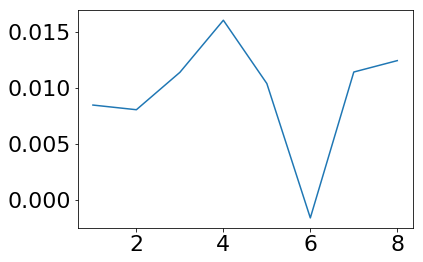

In [66]:
plt.plot(np.arange(1,9),y_hat)